# **Image-to-Text Functional Demonstration**

In [ ]:
#Install necessary packages
#Open source library for computer vision
!pip install Pillow==9.0.0
!pip install opencv-python
import cv2
from PIL import Image, ImageOps

#Free engine library for optical character recognition
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract

#Pyplot for displaying the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Numpy, for storing the image
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
#Download a test image, to demonstrate the function
!wget -O test https://cdn.golfmagic.com/styles/amp_1200/s3/field/image/addtext_com_MTYwNzQ1NzM2OA.jpg

--2022-04-18 05:16:42--  https://cdn.golfmagic.com/styles/amp_1200/s3/field/image/addtext_com_MTYwNzQ1NzM2OA.jpg
Resolving cdn.golfmagic.com (cdn.golfmagic.com)... 13.35.95.17, 13.35.95.49, 13.35.95.105, ...
Connecting to cdn.golfmagic.com (cdn.golfmagic.com)|13.35.95.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83570 (82K) [image/jpeg]
Saving to: ‘test’

test                100%[===================>]  81.61K  --.-KB/s    in 0.01s   

2022-04-18 05:16:42 (6.63 MB/s) - ‘test’ saved [83570/83570]



##As shown, the below function abstracts the function of retrieving text from an image. This function could be used to extend the moderation model to allow for the moderation of images.

In [ ]:
#A function that takes an image and a value for binarizing, and will return any text it can retrieve from the image.
def deriveText(img, binarizeValue):
  #Preprocessing The Image
  #binarize image at value 235 
  binarizedimg = ((img>binarizeValue)*1).astype(np.uint8)

  #Produce a mean filter that will smooth the image, and reduce noise interference.
  kernel = np.ones((10, 10),np.float32)/100
  processedimg = cv2.filter2D(binarizedimg,-1,kernel)

  #Show the processed images and original image side by side, for demonstration
  f, axarr = plt.subplots(1,3)
  figsize=15
  axarr[0].set_title('Original Image')
  axarr[0].imshow(img)
  axarr[1].set_title('Binarized Image')
  axarr[1].imshow(binarizedimg)
  axarr[2].set_title('Binarized and Smoothed Image')
  axarr[2].imshow(processedimg)

  #Extract the text
  return pytesseract.image_to_string(processedimg)

SAYS HE S PLAYING TERRIBLY

; =
ror

fi , aa nia

/

HITS 14 OUT OF 14 FAIRWAYS



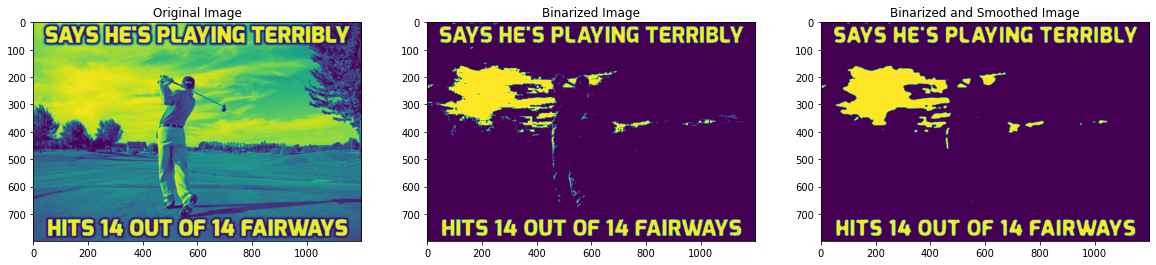

In [ ]:
#Load an example image
img = np.asarray(Image.open('test').convert('L'))

#Call 'deriveText' to retrieve the text from the image, with binarize value 235
output = deriveText(img, 235)

#The output, ready to predict its label in the moderation model
print(output)